### FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS

##### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline
from matplotlib.dates import DateFormatter
from datetime import datetime
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
    
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['font.size'] = 11

#### Load Dataset

In [2]:
df = pd.read_csv('exchange_rate.csv')
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [3]:
df.shape

(7588, 2)

In [4]:
df.dtypes

date        object
Ex_rate    float64
dtype: object

In [5]:
df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [6]:
df['date'].str.strip()

0       01-01-1990 00:00
1       02-01-1990 00:00
2       03-01-1990 00:00
3       04-01-1990 00:00
4       05-01-1990 00:00
              ...       
7583    06-10-2010 00:00
7584    07-10-2010 00:00
7585    08-10-2010 00:00
7586    09-10-2010 00:00
7587    10-10-2010 00:00
Name: date, Length: 7588, dtype: object

### Data Preparation and Exploration

In [7]:
# Rename first column to 'Date' and parse it
date_col = df.columns[0]
df.rename(columns={date_col: 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], format='mixed', errors='coerce')

In [8]:
df

,Date,Ex_rate
0,1990-01-01,0.785500
1,1990-02-01,0.781800
2,1990-03-01,0.786700
3,1990-04-01,0.786000
4,1990-05-01,0.784900
...,...,...
7583,2010-06-10,0.718494
7584,2010-07-10,0.721839
7585,2010-08-10,0.723197
7586,2010-09-10,0.720825


In [9]:
# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas 
df["Year"] = df['Date'].dt.strftime("%Y") # year extraction

In [10]:
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

In [11]:
df.head(5)

,Ex_rate,Year
Date,,
1990-01-01,0.7855,1990
1990-01-02,0.7500,1990
1990-01-03,0.7471,1990
1990-01-04,0.7587,1990
1990-01-05,0.7852,1990


#### Initial Exploration: 
##### Plotting the time series for currency to understand their trends, seasonality, and any anomalies.

<Axes: xlabel='Date'>

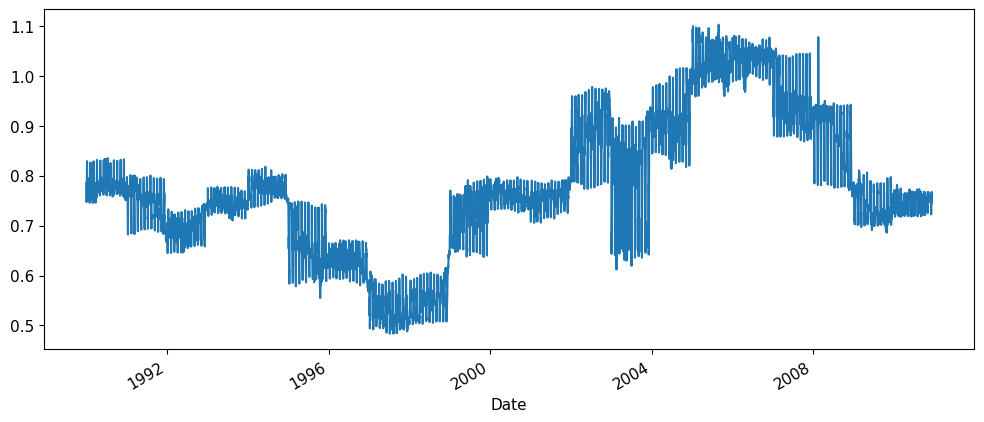

In [12]:
df['Ex_rate'].plot()

<Axes: xlabel='Year', ylabel='Ex_rate'>

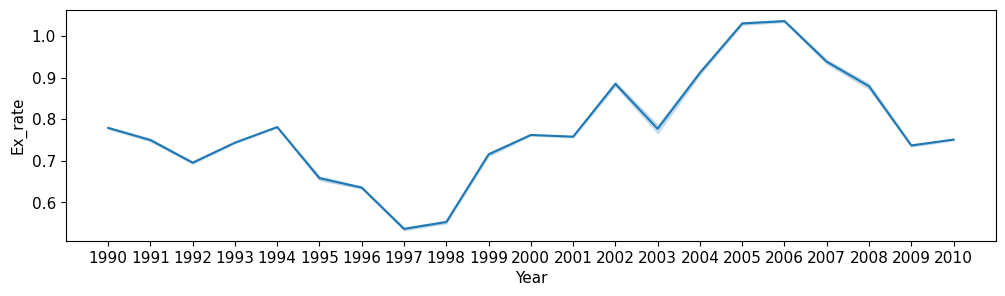

In [13]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="Ex_rate",data=df)

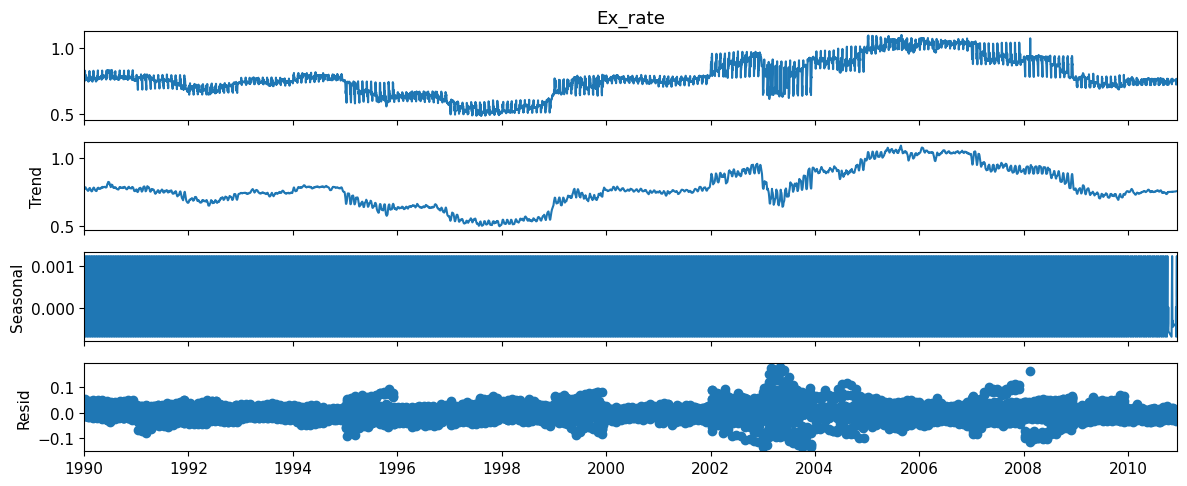

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(df['Ex_rate'], model='additive', period=12)
decompose_ts_add.plot()
plt.show()

<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* We can see no spicific trend or pattern followed in the above chart, the chart shows how the exchange rates varies so far in the years
* Observerd : There is downward trend until year 1997 has the lowest exchange rates meaning australian dollar is stronger than the USD, as compared to the all years and very high exchange rate variation in the years 2001 - 2004 showing rise in the USD strength and after year 2007 there is again some fluctuation.
* Trend : A clear downward slope in years 1990 - 1998 - AUD is with good stregnth
* After year 2001 USD gaining recovery and strength. Slight decline after year 2007
* Seasonal Component : The plot is flat, there is no seasonality which is good.
* Residual : Mostly centered around zero, but there are some variaton during year 2003 - 2004, may be due to market values, or change in the interest rates.
   
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

### Descriptive statistics 

In [15]:
df.isnull().sum()

Ex_rate    0
Year       0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7588 entries, 1990-01-01 to 2010-12-09
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
 1   Year     7588 non-null   object 
dtypes: float64(1), object(1)
memory usage: 177.8+ KB


In [17]:
df['Ex_rate'].describe()

count    7588.000000
mean        0.776974
std         0.136620
min         0.483297
25%         0.701422
50%         0.761377
75%         0.873477
max         1.102536
Name: Ex_rate, dtype: float64

<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* After parsing date column, from the descriptive statitics, thers is no presence of any null values
   
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

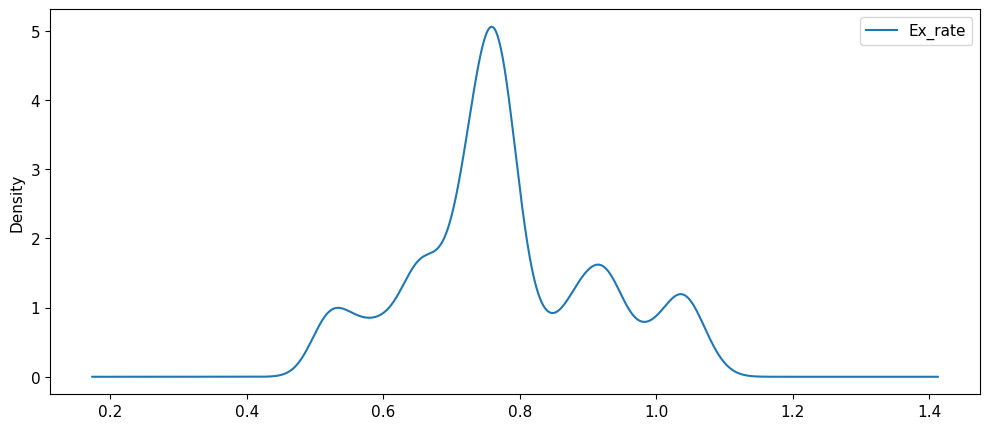

In [18]:
df.plot(kind='kde')
plt.show()

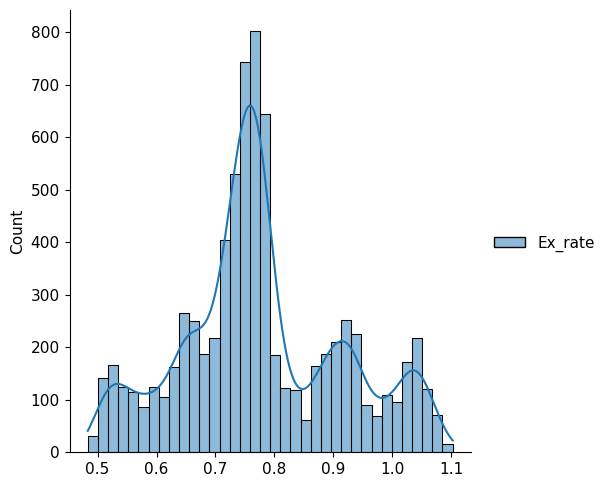

In [19]:
sns.displot(df, kde=True)

In [20]:
#Jarque Bera Stastical Test for Normality
from scipy.stats import jarque_bera as jb
is_norm=jb(df["Ex_rate"])[1]
print(f"p value:{is_norm.round(2)}", ", Data is Normal" if is_norm >0.05 else ", Data is Non-Normal")

p value:0.0 , Data is Non-Normal


<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* We can clearly see the the data is not normal, the data is not symmetrically distributed.
* Multiple peaks, lack of symmetry
* The Jarque Bera Stastical Test for Normality also shows the data is not norrmal.
* Financial time series rarely follow a normal distribution.
   
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

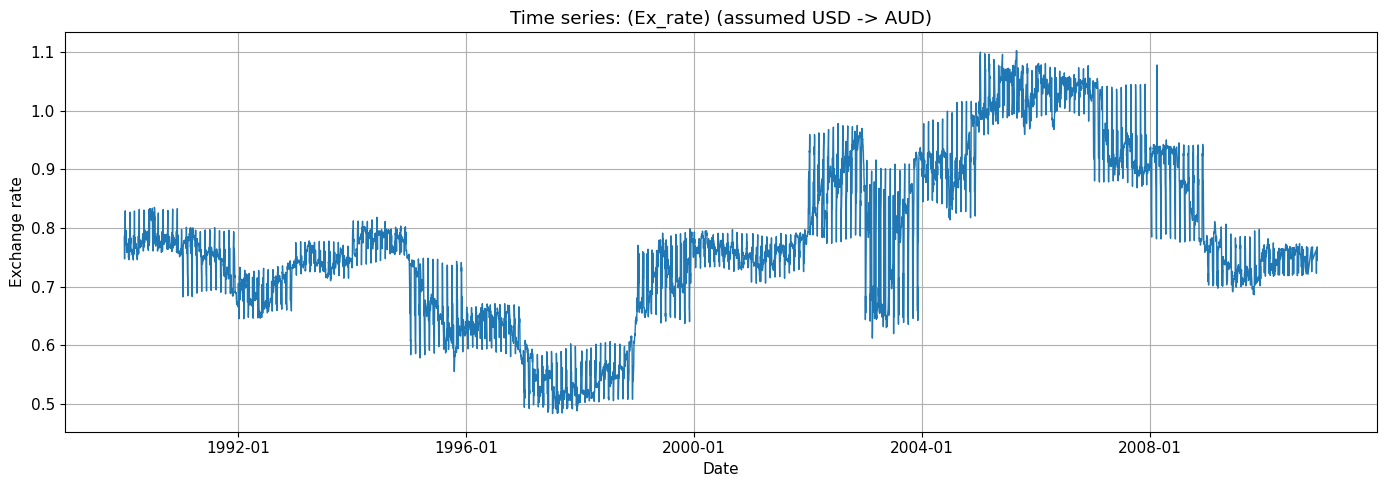

In [21]:
plt.figure(figsize=(14,5))
plt.plot(df.index, df['Ex_rate'], linewidth=1)
plt.title(f"Time series: (Ex_rate) (assumed USD -> AUD)")
plt.xlabel("Date")
plt.ylabel("Exchange rate")
plt.gca().xaxis.set_major_formatter(DateFormatter("%Y-%m"))
plt.grid(True)
plt.tight_layout()
plt.show()

<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* The plot clearly shows there is no trend is followed and there is no seasonality.
 
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

<Axes: xlabel='Date', ylabel='Ex_rate'>

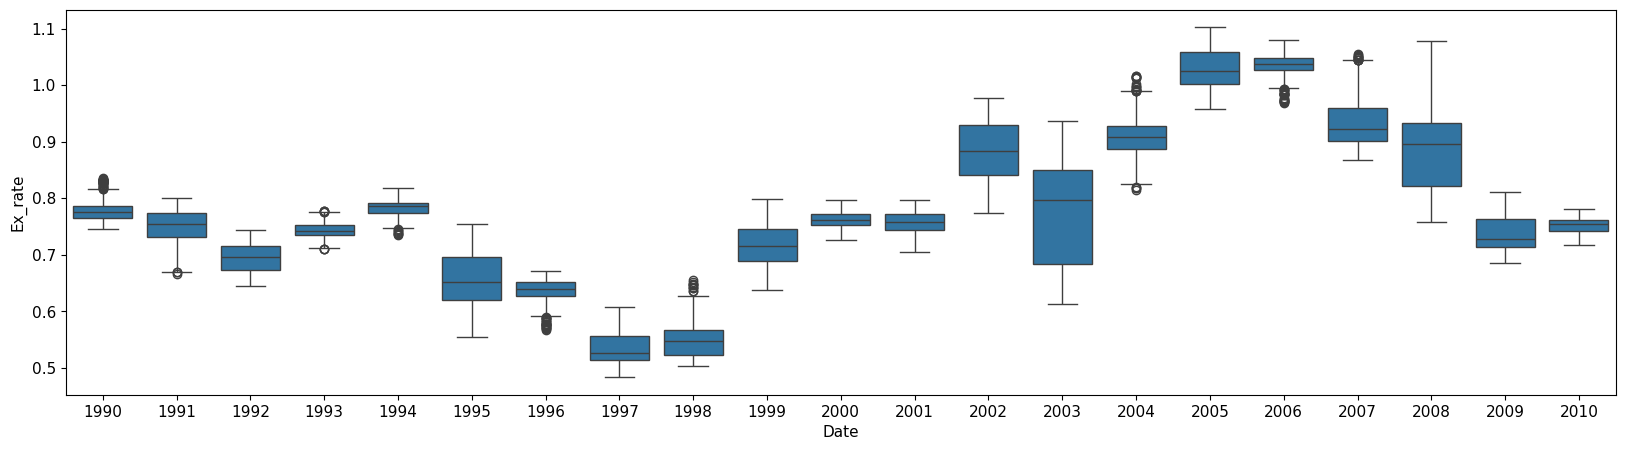

In [22]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x = df.index.year, y = df.Ex_rate, ax=ax)

<Axes: xlabel='Date', ylabel='Ex_rate'>

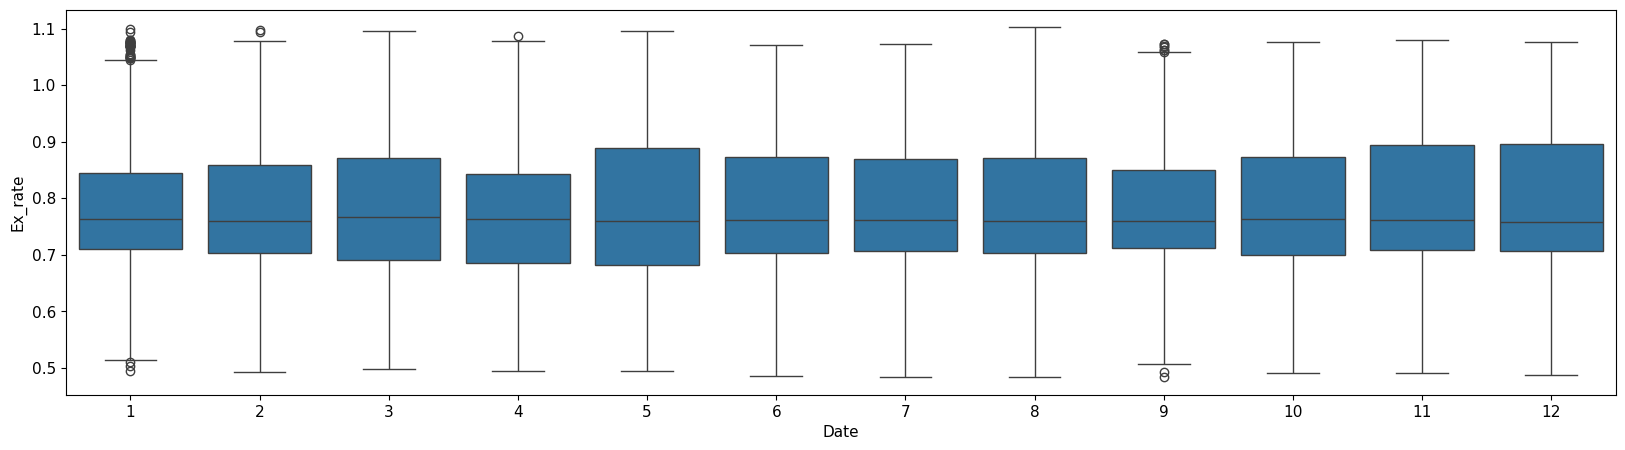

In [23]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x = df.index.month, y = df.Ex_rate, ax=ax)

<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* The time series follows long term trend, ups and downs in years, while monthly there is now trend followed.
* There is no seasonality or no repeating patterns in certais months, quarters or years followed.
    
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

### Model Building - ARIMA

#### Parameter Selection for ARIMA: 
##### Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.

#### Augmented Dickey-Fuller (ADF) test
For applying ARIMA model the data needs to be stationary, the mean and the standard deviations over a time period should be stationary. So we will apply ADK test to make the data stationary and getting a p, d, and q values using acf_plot and pacf_plot

In [24]:
# import the adfuller function from statsmodel package to perform ADF test
from statsmodels.tsa.stattools import adfuller

# extracting values from data frame
values = df['Ex_rate']

# passing the extracted values to adfuller function.
res = adfuller(values)
print(res)

# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f'  %res[1])

# printing the critical values at different alpha levels and the result of the test.
print('critical values at different levels:')
for k, v in res[4].items():
    print (k, v)
if (res[1] > 0.025):
    print("The time series is non-stationary")

(-1.2595217809461385, 0.6474818205329416, 35, 7552, {'1%': -3.431216197578816, '5%': -2.861922794140392, '10%': -2.5669737568795616}, -38249.33988369527)
Augmneted Dickey_fuller Statistic: -1.259522
p-value: 0.647482
critical values at different levels:
1% -3.431216197578816
5% -2.861922794140392
10% -2.5669737568795616
The time series is non-stationary


<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* The p-value is 0.647 which is greater than 0.05, the series is non stationary.
    
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

#### De-trending with first order differencing (Making a series stationary for getting acf_plot and pacf_plot)

0.0
p value:0.0 , Series is Stationary


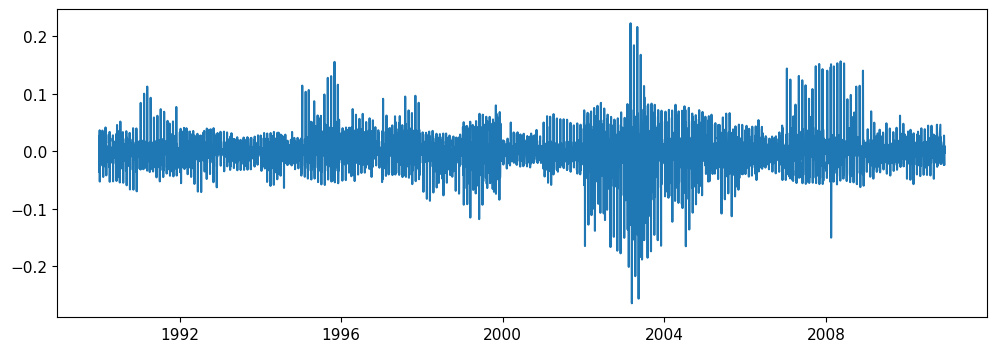

In [25]:
data1 = pd.DataFrame(df["Ex_rate"].diff())
de_trended = data1.dropna()
adf2 = adfuller(de_trended.values)[1]
print(adf2)
print(f"p value:{adf2}", ", Series is Stationary" if adf2 <0.05 else ", Series is Non-Stationary")
plt.figure(figsize = (12,4))
plt.plot(de_trended);
plt.show()


<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* Using a first order differenciation we have made the series stationary. 
    
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

### Partial Autocorrelation Plot (PACF) and Autocorrelation Plot (ACF)
To estimate initial parameters (p, d, q) for the ARIMA model

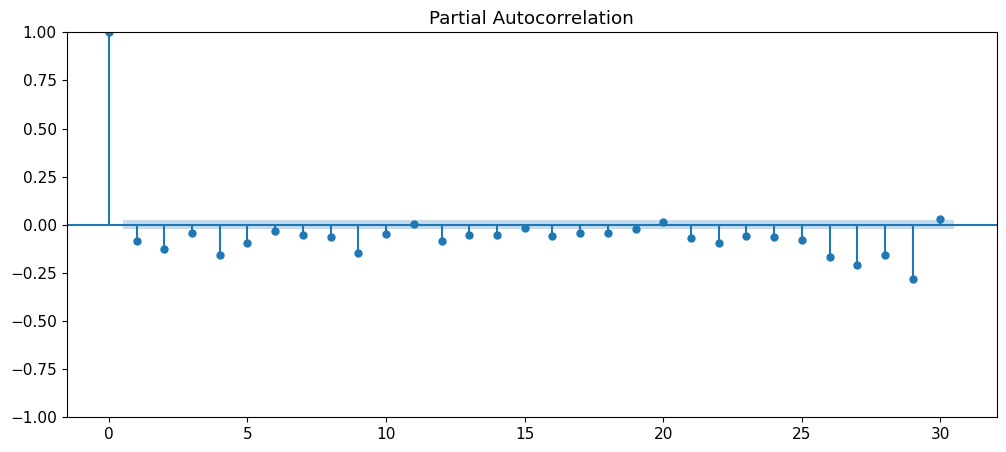

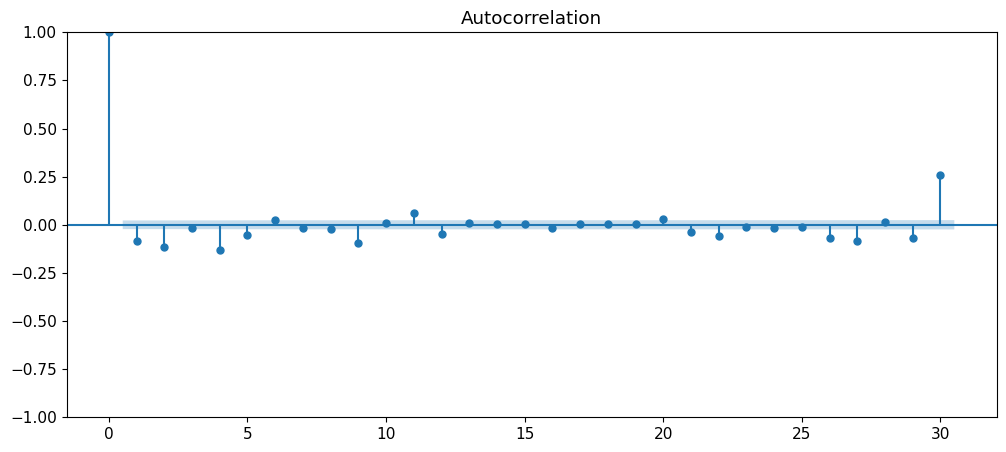

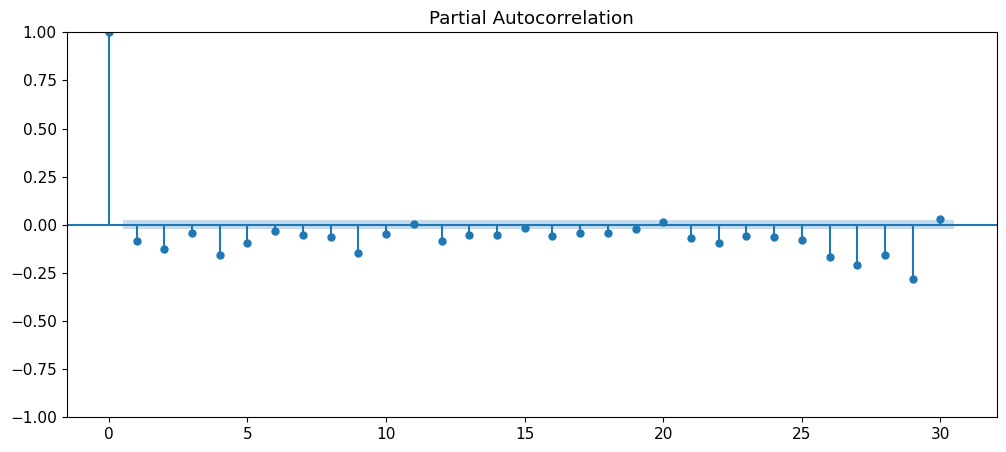

In [26]:
import statsmodels.graphics.tsaplots as tsa_plots

tsa_plots.plot_acf(de_trended.values, lags=30)
tsa_plots.plot_pacf(de_trended.values, lags=30)

<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* Using the ACF and PACF plots, we will find the best p,d and q values to build the model and forecast the future data
    
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

### Building the model for chosen for p,d,q values of p=2, d=1, q=2¶

In [27]:
df = df.iloc[:, :-1]
df

,Ex_rate
Date,
1990-01-01,0.785500
1990-01-02,0.750000
1990-01-03,0.747100
1990-01-04,0.758700
1990-01-05,0.785200
...,...
2010-12-05,0.760427
2010-12-06,0.756344
2010-12-07,0.765931


In [28]:
# load data
#train = pd.read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = df.values
X = X.astype('float32')

### Model Fitting: 
Fit the ARIMA model with the selected parameters to the preprocessed time series.

In [29]:
# fit model
model = ARIMA(X, order=(2,1,2))
model_fit = model.fit()
forecast=model_fit.forecast(steps=180)
forecast

array([0.74516599, 0.74688447, 0.74717636, 0.7479175 , 0.74814101,
       0.74847443, 0.74861254, 0.74876784, 0.74884602, 0.74892031,
       0.74896264, 0.74899887, 0.74902122, 0.74903914, 0.74905077,
       0.74905971, 0.74906571, 0.7490702 , 0.74907328, 0.74907554,
       0.74907711, 0.74907826, 0.74907906, 0.74907964, 0.74908005,
       0.74908034, 0.74908055, 0.7490807 , 0.7490808 , 0.74908088,
       0.74908093, 0.74908097, 0.749081  , 0.74908102, 0.74908103,
       0.74908104, 0.74908105, 0.74908105, 0.74908106, 0.74908106,
       0.74908106, 0.74908106, 0.74908106, 0.74908106, 0.74908106,
       0.74908106, 0.74908106, 0.74908106, 0.74908106, 0.74908106,
       0.74908106, 0.74908106, 0.74908106, 0.74908106, 0.74908106,
       0.74908106, 0.74908106, 0.74908106, 0.74908106, 0.74908106,
       0.74908106, 0.74908106, 0.74908106, 0.74908106, 0.74908106,
       0.74908106, 0.74908106, 0.74908106, 0.74908106, 0.74908106,
       0.74908106, 0.74908106, 0.74908106, 0.74908106, 0.74908

In [30]:
forecastdata = pd.DataFrame()
forecastdata["forecasted_val"] = forecast

In [31]:
forecastdata.head()

,forecasted_val
0,0.745166
1,0.746884
2,0.747176
3,0.747917
4,0.748141


<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* This is the forecasted data with p=2, d=1 and q=2 with 30 lags
* The data is forecated for around 180 day i.e 6 months future data
    
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

In [32]:
df.tail()

,Ex_rate
Date,
2010-12-05,0.760427
2010-12-06,0.756344
2010-12-07,0.765931
2010-12-08,0.767548
2010-12-09,0.745045


In [33]:
# Last date in original data
last_date = df.index[-1]
last_date

Timestamp('2010-12-09 00:00:00')

In [34]:
# Number of forecast rows
n_forecast = len(forecastdata)
n_forecast

180

In [35]:
# Create future date index
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1),
                             periods=n_forecast,
                             freq='D')      

In [36]:
future_dates

DatetimeIndex(['2010-12-10', '2010-12-11', '2010-12-12', '2010-12-13',
               '2010-12-14', '2010-12-15', '2010-12-16', '2010-12-17',
               '2010-12-18', '2010-12-19',
               ...
               '2011-05-29', '2011-05-30', '2011-05-31', '2011-06-01',
               '2011-06-02', '2011-06-03', '2011-06-04', '2011-06-05',
               '2011-06-06', '2011-06-07'],
              dtype='datetime64[ns]', length=180, freq='D')

In [37]:
## Applying Future Date index to forecasted data
forecastdata.index = future_dates
forecastdata.index.name = 'Date'
forecastdata.head()

,forecasted_val
Date,
2010-12-10,0.745166
2010-12-11,0.746884
2010-12-12,0.747176
2010-12-13,0.747917
2010-12-14,0.748141


In [38]:
# Rename forecast column to match df column
forecastdata = forecastdata.rename(columns={'forecasted_val': 'Ex_rate'})
forecastdata.head()

,Ex_rate
Date,
2010-12-10,0.745166
2010-12-11,0.746884
2010-12-12,0.747176
2010-12-13,0.747917
2010-12-14,0.748141


In [39]:
Exchange_rates = pd.concat([df, forecastdata])

In [40]:
Exchange_rates["Year"] = Exchange_rates.index.year # year extraction

In [41]:
Exchange_rates

,Ex_rate,Year
Date,,
1990-01-01,0.785500,1990
1990-01-02,0.750000,1990
1990-01-03,0.747100,1990
1990-01-04,0.758700,1990
1990-01-05,0.785200,1990
...,...,...
2011-06-03,0.749081,2011
2011-06-04,0.749081,2011
2011-06-05,0.749081,2011


<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* Here we have generated the future dates for around 180 days and concatinated the forecastred date and original data.
    
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

### Diagnostics: 
Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.

In [42]:
residuals = model_fit.resid
print(residuals)

[ 0.78549999 -0.03549999 -0.00593578 ...  0.01150248  0.00529791
 -0.01794333]


In [43]:
residuals = pd.Series(residuals, index=df.index)

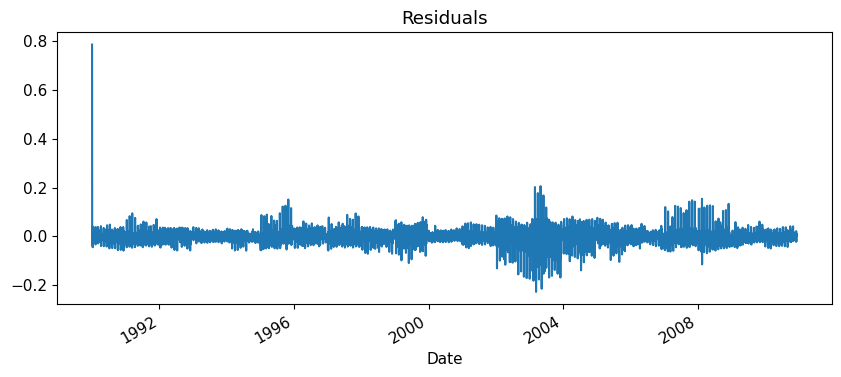

In [44]:
residuals.plot(figsize=(10,4), title="Residuals")
plt.show()

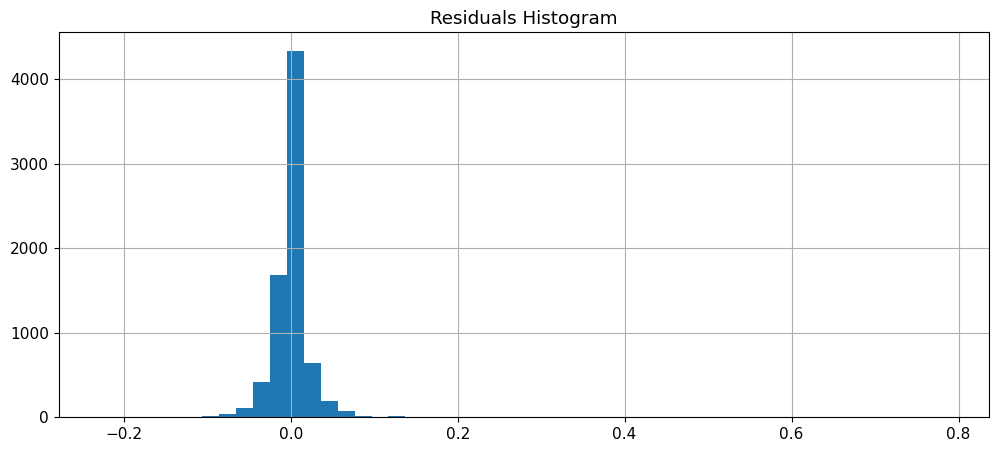

In [45]:
residuals.hist(bins=50)
plt.title("Residuals Histogram")
plt.show()

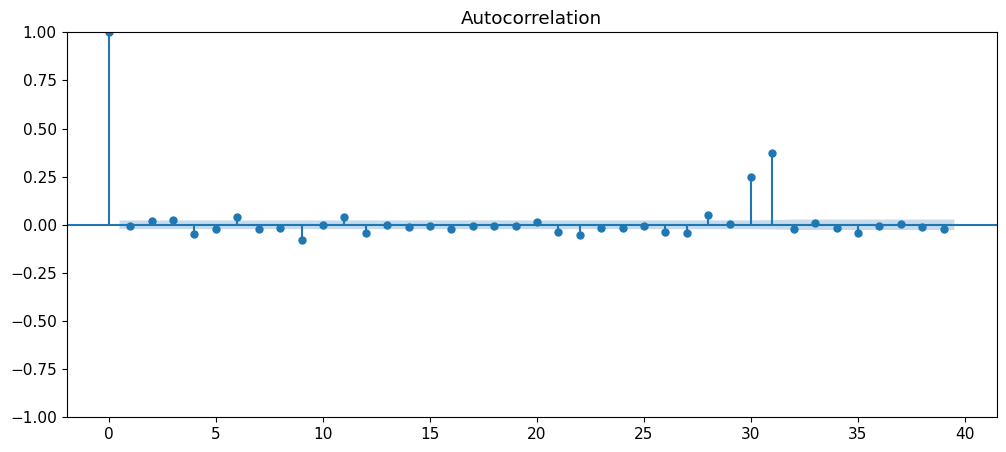

In [46]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals)
plt.show()

<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* The residuals are centered around zero
* small fluctuations, no tend and no seasonality.
* The ARIMA model is unbiased
* There is presence of outliers first point 0.78549999 is a outlier
    
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

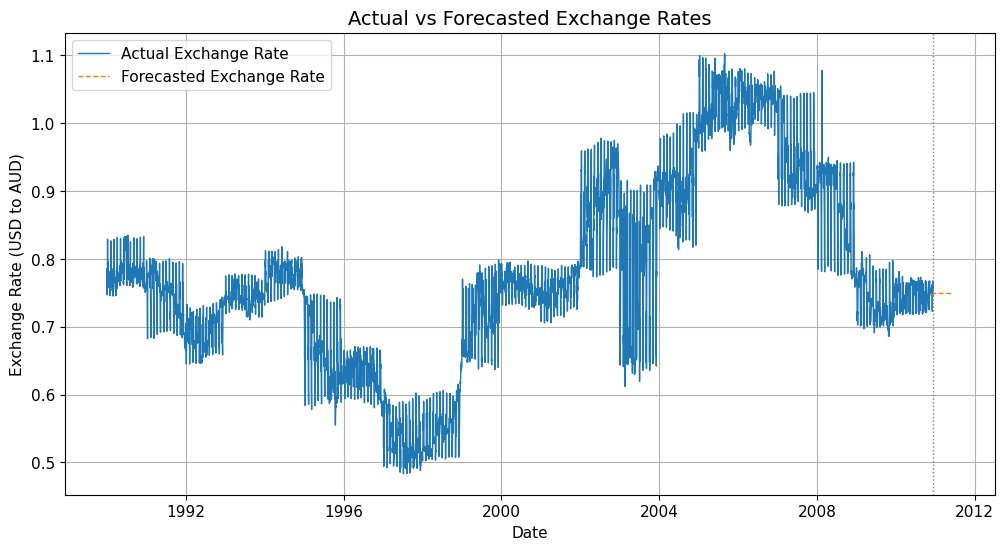

In [47]:
plt.figure(figsize=(12,6))

# Plot original data
plt.plot(df.index, df['Ex_rate'], label='Actual Exchange Rate', linewidth=1)

# Plot forecasted values
plt.plot(forecastdata.index, forecastdata['Ex_rate'],
         label='Forecasted Exchange Rate', linestyle='--', linewidth=1)


# Add vertical line separating actual vs forecast
plt.axvline(x=df.index[-1], color='gray', linestyle=':', linewidth=1)

# Add labels
plt.title('Actual vs Forecasted Exchange Rates', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Exchange Rate (USD to AUD)')
plt.legend()
plt.grid(True)

plt.show()

<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* plot show actual vs forecasted exchange rates for next 6 months with dotted yellow line 
    
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

### Forecasting: 
Perform out-of-sample forecasting and visualize the predicted values against the actual values.

In [48]:
# Split 80% train, 20% test
train_size = int(len(df) * 0.8)
train, test = df['Ex_rate'][:train_size], df['Ex_rate'][train_size:]

In [49]:
# Fitting ARIMA model

fore_model = ARIMA(train, order=(2,1,2))
fore_model_fit = fore_model.fit()

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [50]:
# Forecasting on the Test Data
n_steps = len(test)
forecast = model_fit.forecast(steps=n_steps)

# Convert forecast to Series (match dates)
forecast = pd.Series(forecast, index=test.index)

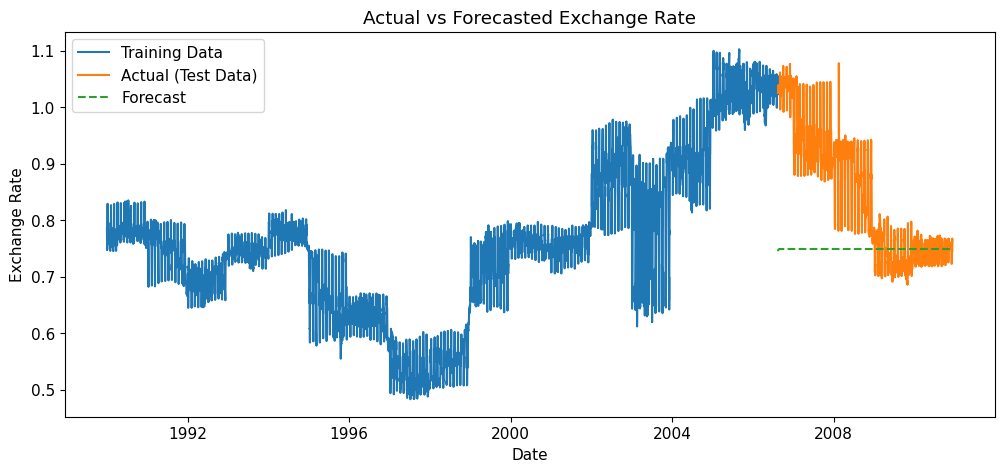

In [51]:
plt.figure(figsize=(12,5))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual (Test Data)')
plt.plot(forecast.index, forecast, label='Forecast', linestyle='--')
plt.title("Actual vs Forecasted Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.show()

In [52]:
 # 6 months ahead
future_forecast = model_fit.forecast(steps=180)  
future_forecast

array([0.74516599, 0.74688447, 0.74717636, 0.7479175 , 0.74814101,
       0.74847443, 0.74861254, 0.74876784, 0.74884602, 0.74892031,
       0.74896264, 0.74899887, 0.74902122, 0.74903914, 0.74905077,
       0.74905971, 0.74906571, 0.7490702 , 0.74907328, 0.74907554,
       0.74907711, 0.74907826, 0.74907906, 0.74907964, 0.74908005,
       0.74908034, 0.74908055, 0.7490807 , 0.7490808 , 0.74908088,
       0.74908093, 0.74908097, 0.749081  , 0.74908102, 0.74908103,
       0.74908104, 0.74908105, 0.74908105, 0.74908106, 0.74908106,
       0.74908106, 0.74908106, 0.74908106, 0.74908106, 0.74908106,
       0.74908106, 0.74908106, 0.74908106, 0.74908106, 0.74908106,
       0.74908106, 0.74908106, 0.74908106, 0.74908106, 0.74908106,
       0.74908106, 0.74908106, 0.74908106, 0.74908106, 0.74908106,
       0.74908106, 0.74908106, 0.74908106, 0.74908106, 0.74908106,
       0.74908106, 0.74908106, 0.74908106, 0.74908106, 0.74908106,
       0.74908106, 0.74908106, 0.74908106, 0.74908106, 0.74908

In [53]:
future_forecast_data = pd.DataFrame()
future_forecast_data["forecasted_rate"] = future_forecast

In [54]:
test.tail()

Date
2010-12-05    0.760427
2010-12-06    0.756344
2010-12-07    0.765931
2010-12-08    0.767548
2010-12-09    0.745045
Name: Ex_rate, dtype: float64

In [55]:
# Last date in original data
last_date_test = test.index[-1]
last_date_test

Timestamp('2010-12-09 00:00:00')

In [56]:
# Number of forecast rows
n_forecasted = len(future_forecast_data)
n_forecasted

180

In [57]:
# Create future date index
forecasted_future_dates = pd.date_range(start=last_date_test + pd.Timedelta(days=1),
                             periods=n_forecasted,
                             freq='D') 

In [58]:
forecasted_future_dates

DatetimeIndex(['2010-12-10', '2010-12-11', '2010-12-12', '2010-12-13',
               '2010-12-14', '2010-12-15', '2010-12-16', '2010-12-17',
               '2010-12-18', '2010-12-19',
               ...
               '2011-05-29', '2011-05-30', '2011-05-31', '2011-06-01',
               '2011-06-02', '2011-06-03', '2011-06-04', '2011-06-05',
               '2011-06-06', '2011-06-07'],
              dtype='datetime64[ns]', length=180, freq='D')

In [59]:
## Applying Future Date index to forecasted data
future_forecast_data.index = forecasted_future_dates
future_forecast_data.index.name = 'Date'
future_forecast_data.head()

,forecasted_rate
Date,
2010-12-10,0.745166
2010-12-11,0.746884
2010-12-12,0.747176
2010-12-13,0.747917
2010-12-14,0.748141


In [60]:
future_forecast_data

,forecasted_rate
Date,
2010-12-10,0.745166
2010-12-11,0.746884
2010-12-12,0.747176
2010-12-13,0.747917
2010-12-14,0.748141
...,...
2011-06-03,0.749081
2011-06-04,0.749081
2011-06-05,0.749081


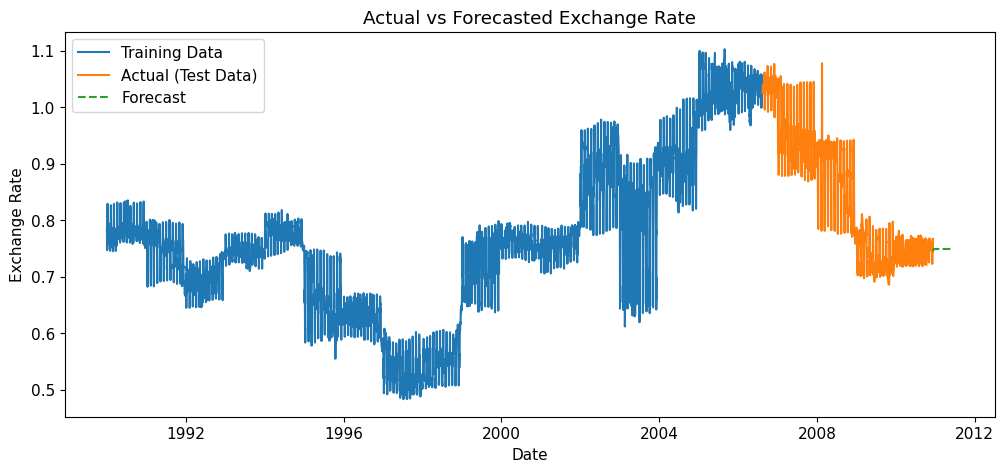

In [61]:
plt.figure(figsize=(12,5))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual (Test Data)')
plt.plot(future_forecast_data.index, future_forecast_data, label='Forecast', linestyle='--')
plt.title("Actual vs Forecasted Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.show()

<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* Forecasting shows the out-of-sample forecasting and visualizing the predicted values (Green color) against the actual values (Test data -yellow color) .

<hr style="height:3px;border:none;color:#008000;background-color:#008000;">



In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(test, forecast, squared=False)
mae  = mean_absolute_error(test, forecast)
mape = np.mean(np.abs((test - forecast) / test)) * 100

print("------------------------------")
print(" ARIMA Model (p=2, d=1, q=2)")
print("------------------------------\\")
print("RMSE:", rmse)
print("MAE :", mae)
print("MAPE :", mape)
print(model_fit.aic)

------------------------------
 ARIMA Model (p=2, d=1, q=2)
------------------------------\
RMSE: 0.14856783920647457
MAE : 0.11240986587255786
MAPE : 12.052320981167407
-35782.55895147734


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* Evaluation of Your ARIMA(2,1,2) Forecast Performance : Both RSME and MAE are low, means the ARIMA model is predicting well, which is good for financial data.
* The ARIMA model appars to be, well fitted, not overfitting, stable, and predicting accurately.
    
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

### Model Building - Exponential Smoothing

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [64]:
data = pd.read_csv("exchange_rate.csv", parse_dates=True, header=0)

In [65]:
data.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [66]:
data['date'].str.strip()

0       01-01-1990 00:00
1       02-01-1990 00:00
2       03-01-1990 00:00
3       04-01-1990 00:00
4       05-01-1990 00:00
              ...       
7583    06-10-2010 00:00
7584    07-10-2010 00:00
7585    08-10-2010 00:00
7586    09-10-2010 00:00
7587    10-10-2010 00:00
Name: date, Length: 7588, dtype: object

In [67]:
# Rename first column to 'Date' and parse it
date_col = data.columns[0]
data.rename(columns={date_col: 'Date'}, inplace=True)
data['Date'] = pd.to_datetime(data['Date'], format='mixed', errors='coerce')

In [68]:
data.head(5)

,Date,Ex_rate
0,1990-01-01,0.7855
1,1990-02-01,0.7818
2,1990-03-01,0.7867
3,1990-04-01,0.7860
4,1990-05-01,0.7849


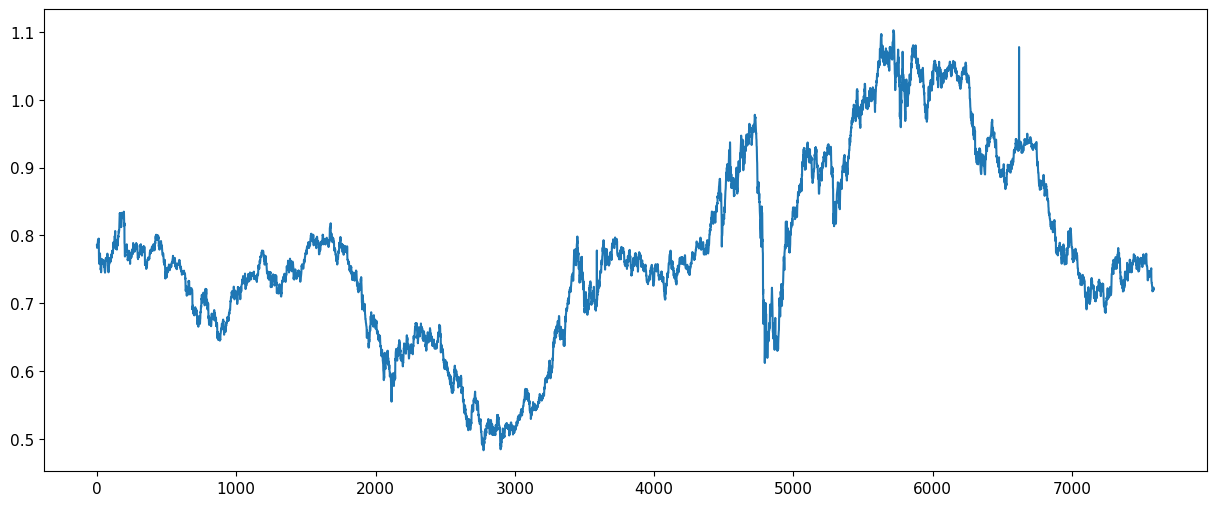

In [69]:
plt.figure(figsize=(15,6))
#Walmart.Footfalls.plot()
plt.plot(data.index, data["Ex_rate"])

#### Splitting Data

In [70]:
data.shape

(7588, 2)

In [71]:
Train = data.head(6588)
Test = data.tail(1000)
Test.tail(12)

,Date,Ex_rate
7576,2010-09-29,0.724506
7577,2010-09-30,0.721553
7578,2010-01-10,0.717618
7579,2010-02-10,0.719114
7580,2010-03-10,0.719114
7581,2010-04-10,0.719735
7582,2010-05-10,0.718701
7583,2010-06-10,0.718494
7584,2010-07-10,0.721839
7585,2010-08-10,0.723197


In [72]:
Test.shape

(1000, 2)

In [73]:
 Test.index[0]

6588

### Time series decomposition plot¶

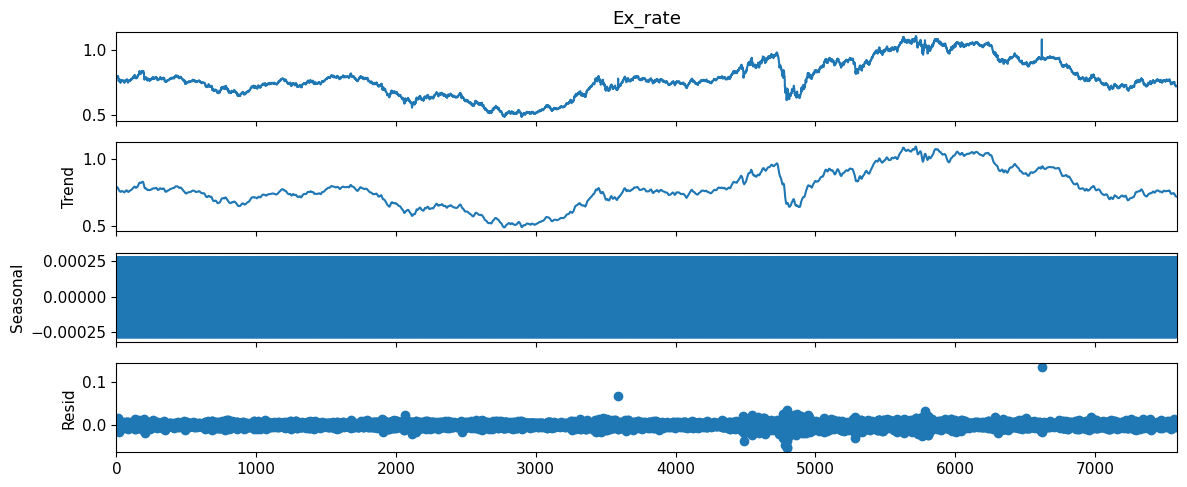

In [74]:
decompose_ts_add = seasonal_decompose(data.Ex_rate,period= 12)
decompose_ts_add.plot()
plt.show()

<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* We can see no spicific trend or pattern followed in the above chart, the chart shows how the exchange rates varies so far in the years
* Observerd : There is downward trend until year 1997 has the lowest exchange rates meaning australian dollar is stronger than the USD, as compared to the all years and very high exchange rate variation in the years 2001 - 2004 showing rise in the USD strength and after year 2007 there is again some fluctuation.
* Trend : A clear downward slope in years 1990 - 1998 - AUD is with good stregnth
* After year 2001 USD gaining recovery and strength. Slight decline after year 2007
* Seasonal Component : The plot is flat, there is no seasonality which is good.
* Residual : Mostly centered around zero, but there are some variaton during year 2003 - 2004, may be due to market values, or change in the interest rates.
   
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

### Simple Exponential Method

In [75]:
ses_model = SimpleExpSmoothing(Train["Ex_rate"]).fit(smoothing_level=0.02)
pred_ses = pd.DataFrame()
pred_ses["Exp_Smoothing"] = ses_model.predict(start = Test.index[0],end = Test.index[-1])
#MAPE(pred_ses["Exp_Smoothing"],Test.Ex_rate) 


C:\Users\User\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [76]:
pred_ses

,Exp_Smoothing
6588,0.90442
6589,0.90442
6590,0.90442
6591,0.90442
6592,0.90442
...,...
7583,0.90442
7584,0.90442
7585,0.90442
7586,0.90442


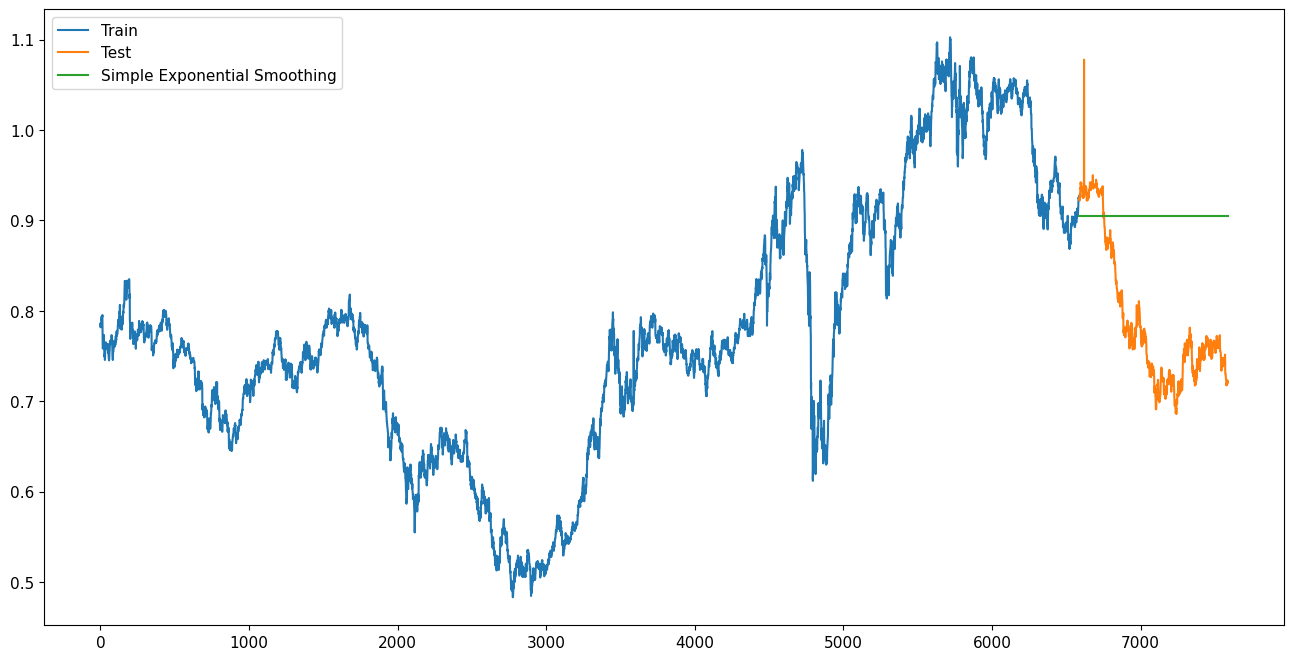

In [77]:
plt.figure(figsize=(16,8))
plt.plot(Train["Ex_rate"], label='Train')
plt.plot(Test["Ex_rate"], label='Test')
plt.plot(pred_ses["Exp_Smoothing"], label='Simple Exponential Smoothing')
plt.legend(loc='best')
plt.show()

In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

ses_rmse = mean_squared_error(Test["Ex_rate"].values, pred_ses.values, squared=False)
ses_mae  = mean_absolute_error(Test["Ex_rate"].values, pred_ses.values)
ses_mape = np.mean(np.abs((Test["Ex_rate"].values - pred_ses.values) / Test["Ex_rate"].values)) * 100

print("---------------------------")
print("Simple Exponential Method")
print("---------------------------")
print("RMSE:", ses_rmse)
print("MAE :", ses_mae)
print("MAPE :", ses_mape)

---------------------------
Simple Exponential Method
---------------------------
RMSE: 0.13748139861892025
MAE : 0.12372266428071615
MAPE : 16.464063508525772


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Holt method 

In [79]:
# Holt method 
hw_model = Holt(Train["Ex_rate"]).fit(smoothing_level=0.02, smoothing_trend=0.03)
pred_hw = pd.DataFrame()
pred_hw["holt_method"] = hw_model.predict(start = Test.index[0],end = Test.index[-1])
#MAPE(pred_hw["holt_method"],Test.Ex_rate) 

C:\Users\User\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


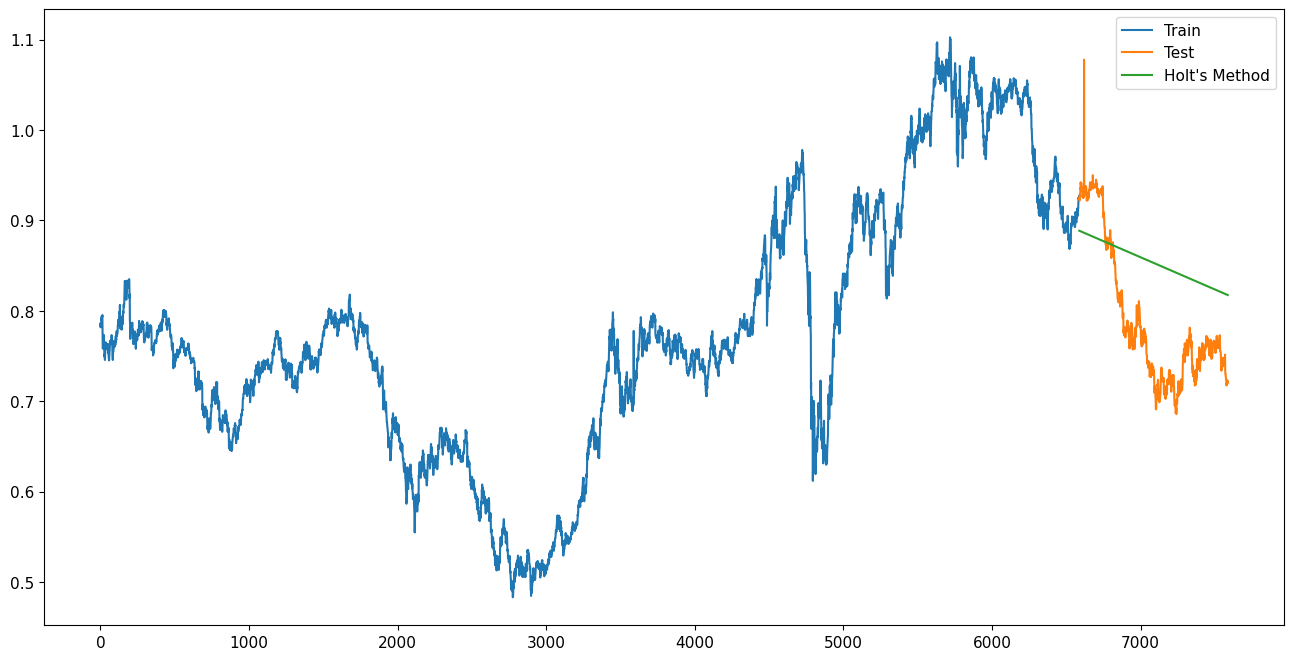

In [80]:
plt.figure(figsize=(16,8))
plt.plot(Train["Ex_rate"], label='Train')
plt.plot(Test["Ex_rate"], label='Test')
plt.plot(pred_hw["holt_method"], label="Holt's Method")
plt.legend(loc='best')
plt.show()

In [81]:
hw_rmse = mean_squared_error(Test["Ex_rate"].values, pred_hw.values, squared=False)
hw_mae  = mean_absolute_error(Test["Ex_rate"].values, pred_hw.values)
hw_mape = np.mean(np.abs((Test["Ex_rate"].values - pred_hw.values) / Test["Ex_rate"].values)) * 100

print("---------------------------")
print("Holt Exponential Method")
print("---------------------------")
print("RMSE:", hw_rmse)
print("MAE :", hw_mae)
print("MAPE :", hw_mape)

---------------------------
Holt Exponential Method
---------------------------
RMSE: 0.08807242586754592
MAE : 0.08011447480877355
MAPE : 12.140585015984184


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Holts winter exponential smoothing with additive seasonality and additive trend


In [82]:
hwe_model_add_add = ExponentialSmoothing(Train["Ex_rate"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.02, smoothing_trend=0.03, smoothing_seasonal=0.01) #add the trend to the model
pred_hwe_add_add = pd.DataFrame()
pred_hwe_add_add["holt_winter_method"] = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
#MAPE(pred_hwe_add_add["holt_winter_method"],Test.Ex_rate) 

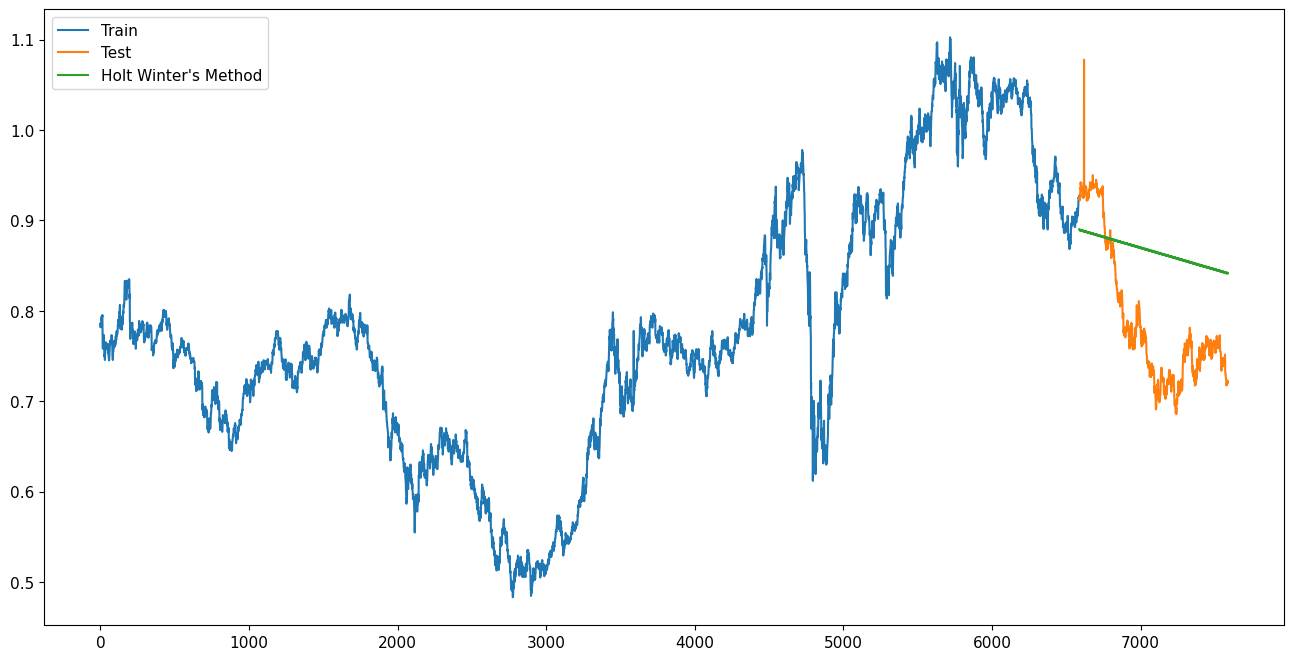

In [83]:
plt.figure(figsize=(16,8))
plt.plot(Train["Ex_rate"], label='Train')
plt.plot(Test["Ex_rate"], label='Test')
plt.plot(pred_hwe_add_add["holt_winter_method"], label="Holt Winter's Method")
plt.legend(loc='best')
plt.show()

In [84]:
hwe_rmse = mean_squared_error(Test["Ex_rate"].values, pred_hwe_add_add.values, squared=False)
hwe_mae  = mean_absolute_error(Test["Ex_rate"].values, pred_hwe_add_add.values)
hwe_mape = np.mean(np.abs((Test["Ex_rate"].values - pred_hwe_add_add.values) / Test["Ex_rate"].values)) * 100

print("---------------------------")
print("Holts winter Exponential Method")
print("---------------------------")
print("RMSE:", hwe_rmse)
print("MAE :", hwe_mae)
print("MAPE :", hwe_mape)

---------------------------
Holts winter Exponential Method
---------------------------
RMSE: 0.10027056812720012
MAE : 0.09134816602390544
MAPE : 13.091312878010866


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* Holt-Winter : fits with 3 parameters Level + Trend + Seasonality
* Holt : fits with Level + Trend
* SES : fits with Level
* Parameters :
    * α (alpha): Level smoothing
    * β (beta): Trend smoothing
    * γ (gamma): Seasonality smoothing
    * seasonal_periods (like 12 for monthly)

<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

### Parameter Optimization: 
Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.

In [85]:
# Compare AIC values
print("SES AIC:", ses_model.aic)
print("Holt AIC:", hw_model.aic)
print("Holt-Winters AIC:", hwe_model_add_add.aic)

SES AIC: -47081.80099425653
Holt AIC: -46463.53615026809
Holt-Winters AIC: -47423.45053316514


## Evaluation and Comparison
Getting all models RMSE, MAE, MAPE scores and AIC scores at ine place for comparison

In [86]:
print("Evaluation Matrics :")
print("------------------------------")
print(" ARIMA Model (p=2, d=1, q=2)")
print("------------------------------")
print("RMSE:", rmse)
print("MAE :", mae)
print("MAPE :", mape)

print("===============================================")

print("---------------------------")
print("Simple Exponential Method")
print("---------------------------")
print("RMSE:", ses_rmse)
print("MAE :", ses_mae)
print("MAPE :", ses_mape)

print("===============================================")

print("---------------------------")
print("Holt Exponential Method")
print("---------------------------")
print("RMSE:", hw_rmse)
print("MAE :", hw_mae)
print("MAPE :", hw_mape)

print("===============================================")

print("---------------------------")
print("Holts winter Exponential Method")
print("---------------------------")
print("RMSE:", hwe_rmse)
print("MAE :", hwe_mae)
print("MAPE :", hwe_mape)

print("===============================================")

# Compare AIC values
print("---------------------------")
print("AIC Parameters :")
print("---------------------------")
print("ARIMA AIC:", model_fit.aic)
print("SES AIC:", ses_model.aic)
print("Holt AIC:", hw_model.aic)
print("Holt-Winters AIC:", hwe_model_add_add.aic)

Evaluation Matrics :
------------------------------
 ARIMA Model (p=2, d=1, q=2)
------------------------------
RMSE: 0.14856783920647457
MAE : 0.11240986587255786
MAPE : 12.052320981167407
---------------------------
Simple Exponential Method
---------------------------
RMSE: 0.13748139861892025
MAE : 0.12372266428071615
MAPE : 16.464063508525772
---------------------------
Holt Exponential Method
---------------------------
RMSE: 0.08807242586754592
MAE : 0.08011447480877355
MAPE : 12.140585015984184
---------------------------
Holts winter Exponential Method
---------------------------
RMSE: 0.10027056812720012
MAE : 0.09134816602390544
MAPE : 13.091312878010866
---------------------------
AIC Parameters :
---------------------------
ARIMA AIC: -35782.55895147734
SES AIC: -47081.80099425653
Holt AIC: -46463.53615026809
Holt-Winters AIC: -47423.45053316514


<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* For comparing the models
    * For prediction accuracy we check : RMSE, MAE and MAPE
    * For Model Fit : We check AIC
    * ARIMA performing moderate, as AIC is quite high compared to other models
    * SES is underperforming due to model trend
    * Based forecasting model on predicton and accuracy the Holt’s Linear Trend Model predicting the future exchange rates accurately. Lowest MAE, Lowest RSME and capturing the trend erfectly.
    * Based on model fit, Lowest AIC, Best in-sample fit 
    * ARIMA Performs reasonably well but is outperformed by Holt in both simplicity and accuracy. Also ARIMA has the worst AIC.
    * ARIMA is acceptable but not optimal. It can perform well by hyperparameter tuning well with trying different p, d and q values.
    * AIC suggests Holt-Winters fits the data best, but accuracy favors Holt.
    * So Final Recommandation would be using Holt’s Linear Trend model for forecasting. As it achieves the best balance of accuracy and interpretability.
    
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">